PROJECT PYTHON FOR DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score

In [2]:
#Load data set
data = pd.read_csv("C:/Users/moi/Dataset/Training/Features_Variant_1.csv",header=None)
print(data.shape)
data.head()

(40949, 54)


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
#Rename column

Page_derived = ["Page {}".format(i) for i in range(5)]
Min_derived = ["Min Page {}".format(i) for i in range(5)]
Max_derived = ["Max Page {}".format(i) for i in range(5)]
Average_derived = ["Average Page {}".format(i) for i in range(5)]
Median_derived = ["Median Page {}".format(i) for i in range(5)]
Sd_derived = ["Sd Page {}".format(i) for i in range(5)]
Day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

column =  ["Popularity",
           "Nb_views",
           "Daily_interest",
           "Category",
           "Nb_comments_total_CC1",
           "Nb_comments_last_24h_CC2",
           "Nb_comments_last_48-24h_CC3",
           "Nb_comments_first_24_CC4",           
           "Diff_CC2-CC3",
           "Selected_Time",
           "Nb_characters",
           "Nb_shares",
           "Promoted",
           "H_Hour",
           "Nb_comments_h_hour"
          ]
for i in range(len(Page_derived)):
    column.insert(4+i+4*i,Min_derived[i])
    column.insert(4+i+4*i+1,Max_derived[i])
    column.insert(4+i+4*i+2,Average_derived[i])
    column.insert(4+i+4*i+3,Median_derived[i])
    column.insert(4+i+4*i+4,Sd_derived[i])

for d in range(len(Day)):
    publishedDay="{}_published".format(Day[d])
    column.insert(39+d,publishedDay)

for s in range(len(Day)):
    selectedTimeDay="{}_selected_time".format(Day[s])
    column.insert(46+s,selectedTimeDay)
    
print(len(column))
print(column)
data.columns=column
data.head(10)

54
['Popularity', 'Nb_views', 'Daily_interest', 'Category', 'Min Page 0', 'Max Page 0', 'Average Page 0', 'Median Page 0', 'Sd Page 0', 'Min Page 1', 'Max Page 1', 'Average Page 1', 'Median Page 1', 'Sd Page 1', 'Min Page 2', 'Max Page 2', 'Average Page 2', 'Median Page 2', 'Sd Page 2', 'Min Page 3', 'Max Page 3', 'Average Page 3', 'Median Page 3', 'Sd Page 3', 'Min Page 4', 'Max Page 4', 'Average Page 4', 'Median Page 4', 'Sd Page 4', 'Nb_comments_total_CC1', 'Nb_comments_last_24h_CC2', 'Nb_comments_last_48-24h_CC3', 'Nb_comments_first_24_CC4', 'Diff_CC2-CC3', 'Selected_Time', 'Nb_characters', 'Nb_shares', 'Promoted', 'H_Hour', 'Sunday_published', 'Monday_published', 'Tuesday_published', 'Wednesday_published', 'Thursday_published', 'Friday_published', 'Saturday_published', 'Sunday_selected_time', 'Monday_selected_time', 'Tuesday_selected_time', 'Wednesday_selected_time', 'Thursday_selected_time', 'Friday_selected_time', 'Saturday_selected_time', 'Nb_comments_h_hour']


,Popularity,Nb_views,Daily_interest,Category,Min Page 0,Max Page 0,Average Page 0,Median Page 0,Sd Page 0,Min Page 1,...,Friday_published,Saturday_published,Sunday_selected_time,Monday_selected_time,Tuesday_selected_time,Wednesday_selected_time,Thursday_selected_time,Friday_selected_time,Saturday_selected_time,Nb_comments_h_hour
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0
5,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
6,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
7,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
8,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
9,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,1,0,0,0,0,0,0,0


In [4]:
#Inspecting data
data.describe().astype(int)

,Popularity,Nb_views,Daily_interest,Category,Min Page 0,Max Page 0,Average Page 0,Median Page 0,Sd Page 0,Min Page 1,...,Friday_published,Saturday_published,Sunday_selected_time,Monday_selected_time,Tuesday_selected_time,Wednesday_selected_time,Thursday_selected_time,Friday_selected_time,Saturday_selected_time,Nb_comments_h_hour
count,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,...,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949
mean,1313813,4676,44800,24,1,443,55,35,67,0,...,0,0,0,0,0,0,0,0,0,7
std,6785751,20593,110933,19,20,496,86,69,81,10,...,0,0,0,0,0,0,0,0,0,35
min,36,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,36734,0,698,9,0,45,5,2,8,0,...,0,0,0,0,0,0,0,0,0,0
50%,292911,0,7045,18,0,241,23,12,35,0,...,0,0,0,0,0,0,0,0,0,0
75%,1204214,99,50264,32,0,717,71,42,102,0,...,0,0,0,0,0,0,0,0,0,3
max,486972297,186370,6089942,106,2341,2341,2341,2341,731,1923,...,1,1,1,1,1,1,1,1,1,1305


In [5]:
data.dtypes

Popularity                       int64
Nb_views                         int64
Daily_interest                   int64
Category                         int64
Min Page 0                     float64
Max Page 0                     float64
Average Page 0                 float64
Median Page 0                  float64
Sd Page 0                      float64
Min Page 1                     float64
Max Page 1                     float64
Average Page 1                 float64
Median Page 1                  float64
Sd Page 1                      float64
Min Page 2                     float64
Max Page 2                     float64
Average Page 2                 float64
Median Page 2                  float64
Sd Page 2                      float64
Min Page 3                     float64
Max Page 3                     float64
Average Page 3                 float64
Median Page 3                  float64
Sd Page 3                      float64
Min Page 4                     float64
Max Page 4               

In [6]:
#Preprocessing: Cleaning
data.drop("Promoted",axis=1, inplace=True)

In [7]:
#Preprocessing: Cleaning
Day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
publishedDay=["{}_published".format(Day[d]) for d in range(len(Day))]

def label_day (row):
    for i in range(len(publishedDay)):
        if (row[publishedDay[i]]==1):
            return i
    else:
        return "Error"

data['Day_published'] = data.apply(lambda row: label_day(row), axis=1)

DropListe=[day for day in publishedDay]
data.drop(DropListe,axis=1,inplace=True )
data.head()


,Popularity,Nb_views,Daily_interest,Category,Min Page 0,Max Page 0,Average Page 0,Median Page 0,Sd Page 0,Min Page 1,...,H_Hour,Sunday_selected_time,Monday_selected_time,Tuesday_selected_time,Wednesday_selected_time,Thursday_selected_time,Friday_selected_time,Saturday_selected_time,Nb_comments_h_hour,Day_published
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,24,0,0,0,0,0,0,1,0,3
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,24,0,0,0,0,0,1,0,0,4
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,24,0,0,0,0,0,0,1,0,5
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,24,0,1,0,0,0,0,0,0,5
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,24,0,0,0,1,0,0,0,0,1


In [8]:
#Preprocessing: Cleaning
Day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
selectedTimeDay=["{}_selected_time".format(Day[s]) for s in range(len(Day))]

def label_day (row):
    for i in range(len(selectedTimeDay)):
        if (row[selectedTimeDay[i]]==1):
            return i
    else:
        return "Error"

data['Day_Selected_Time'] = data.apply(lambda row: label_day(row), axis=1)

DropListe=[day for day in selectedTimeDay]
data.drop(DropListe,axis=1,inplace=True )
data.head()

,Popularity,Nb_views,Daily_interest,Category,Min Page 0,Max Page 0,Average Page 0,Median Page 0,Sd Page 0,Min Page 1,...,Nb_comments_last_48-24h_CC3,Nb_comments_first_24_CC4,Diff_CC2-CC3,Selected_Time,Nb_characters,Nb_shares,H_Hour,Nb_comments_h_hour,Day_published,Day_Selected_Time
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,65,166,2,24,0,3,6
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,10,132,1,24,0,4,5
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,14,133,2,24,0,5,6
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,3,7,-3,62,131,1,24,0,5,1
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,58,142,5,24,0,1,3


In [9]:
#Preprocessing: Cleaning

Min_derived_drop = ["Min Page {}".format(i) for i in range(5)]
Max_derived_drop = ["Max Page {}".format(i) for i in range(5)]
Average_derived_drop = ["Average Page {}".format(i) for i in range(5)]
Median_derived_drop = ["Median Page {}".format(i) for i in range(5)]
Sd_derived_drop = ["Sd Page {}".format(i) for i in range(5)]


data.drop(Min_derived_drop,axis=1,inplace=True)
data.drop(Max_derived_drop,axis=1,inplace=True)
data.drop(Average_derived_drop,axis=1,inplace=True)
data.drop(Median_derived_drop,axis=1,inplace=True)
data.drop(Sd_derived_drop,axis=1,inplace=True)

In [10]:
data_scaled = StandardScaler().fit_transform(data)
data_scaled=pd.DataFrame(data_scaled, columns=data.columns)
data_scaled

,Popularity,Nb_views,Daily_interest,Category,Nb_comments_total_CC1,Nb_comments_last_24h_CC2,Nb_comments_last_48-24h_CC3,Nb_comments_first_24_CC4,Diff_CC2-CC3,Selected_Time,Nb_characters,Nb_shares,H_Hour,Nb_comments_h_hour,Day_published,Day_Selected_Time
0,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,1.418871,0.006239,-0.121958,0.120932,-0.206313,-0.022487,1.482581
1,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,-1.210619,-0.084124,-0.123016,0.120932,-0.206313,0.491643,0.980740
2,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,-1.019383,-0.081466,-0.121958,0.120932,-0.206313,1.005772,1.482581
3,-0.100037,-0.227075,-0.399678,-1.165633,-0.355691,-0.287678,-0.234246,-0.356001,-0.058778,1.275444,-0.086782,-0.123016,0.120932,-0.206313,1.005772,-1.026624
4,-0.100037,-0.227075,-0.399678,-1.165633,-0.399495,-0.287678,-0.276454,-0.402811,-0.026931,1.084209,-0.057547,-0.118783,0.120932,-0.206313,-1.050746,-0.022942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,0.863039,-0.223675,4.076353,-0.764638,1.557081,-0.106150,0.539555,1.461779,-0.494013,0.988591,-0.403053,1.474876,-11.338563,-0.178139,-0.022487,0.980740
40945,0.863039,-0.223675,4.076353,-0.764638,4.294826,-0.028353,1.214872,4.418596,-0.939865,0.845164,-0.038942,1.038894,-10.817676,-0.149965,-0.022487,0.980740
40946,0.863039,-0.223675,4.076353,-0.764638,4.119610,7.751395,-0.276454,4.426398,6.554682,-0.780338,-0.116017,3.010333,0.120932,1.822192,-0.022487,0.478899
40947,0.863039,-0.223675,4.076353,-0.764638,4.185316,2.162943,5.913954,4.176746,-2.691423,-0.111014,-0.347240,1.339425,-7.692360,0.582550,-0.022487,0.980740


In [39]:
#Inspecting data
print(data.shape)
data.describe().astype(int)

(40949, 16)


,Popularity,Nb_views,Daily_interest,Category,Nb_comments_total_CC1,Nb_comments_last_24h_CC2,Nb_comments_last_48-24h_CC3,Nb_comments_first_24_CC4,Diff_CC2-CC3,Selected_Time,Nb_characters,Nb_shares,H_Hour,Nb_comments_h_hour,Day_published,Day_Selected_Time
count,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949
mean,1313813,4676,44800,24,55,22,19,52,2,35,163,117,23,7,3,3
std,6785751,20593,110933,19,136,77,71,128,94,20,376,945,1,35,1,1
min,36,0,0,1,0,0,0,0,-1366,0,0,1,1,0,0,0
25%,36734,0,698,9,2,0,0,2,-6,17,38,2,24,0,1,1
50%,292911,0,7045,18,11,2,0,10,0,35,97,13,24,0,3,3
75%,1204214,99,50264,32,46,12,9,44,3,53,172,61,24,3,5,5
max,486972297,186370,6089942,106,2341,2079,1605,2184,2079,72,21480,144860,24,1305,6,6


In [40]:
#Preprocessing: Scaling
datascale= data.copy(deep=True)
scaler = StandardScaler() #We use a Standard Scaler method

datascale["Popularity"] = scaler.fit_transform(data[["Popularity"]])
datascale["Nb_views"] = scaler.fit_transform(data[["Nb_views"]])
datascale["Daily_interest"] = scaler.fit_transform(data[["Daily_interest"]])
datascale["Nb_shares"] = scaler.fit_transform(data[["Nb_shares"]])

datascale["Nb_characters"] = scaler.fit_transform(data[["Nb_characters"]])

datascale["Nb_comments_total_CC1"] = scaler.fit_transform(data[["Nb_comments_total_CC1"]])
datascale["Nb_comments_last_24h_CC2"] = scaler.fit_transform(data[["Nb_comments_last_24h_CC2"]])
datascale["Nb_comments_last_48-24h_CC3"] = scaler.fit_transform(data[["Nb_comments_last_48-24h_CC3"]])
datascale["Nb_comments_first_24_CC4"] = scaler.fit_transform(data[["Nb_comments_first_24_CC4"]])
datascale["Diff_CC2-CC3"] = scaler.fit_transform(data[["Diff_CC2-CC3"]])

In [41]:
#Creation of column Number of Day 
def label_Selected_Time (row):
    if row["Selected_Time"]<24:
        return 1
    elif row["Selected_Time"]<48:
        return 2
    else:
        return 3
datascale['Nb_Day'] = datascale.apply(lambda row: label_Selected_Time(row), axis=1)

datascale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Popularity                   40949 non-null  float64
 1   Nb_views                     40949 non-null  float64
 2   Daily_interest               40949 non-null  float64
 3   Category                     40949 non-null  int64  
 4   Nb_comments_total_CC1        40949 non-null  float64
 5   Nb_comments_last_24h_CC2     40949 non-null  float64
 6   Nb_comments_last_48-24h_CC3  40949 non-null  float64
 7   Nb_comments_first_24_CC4     40949 non-null  float64
 8   Diff_CC2-CC3                 40949 non-null  float64
 9   Selected_Time                40949 non-null  int64  
 10  Nb_characters                40949 non-null  float64
 11  Nb_shares                    40949 non-null  float64
 12  H_Hour                       40949 non-null  int64  
 13  Nb_comments_h_ho

########## Heatmap ##########

<AxesSubplot:>

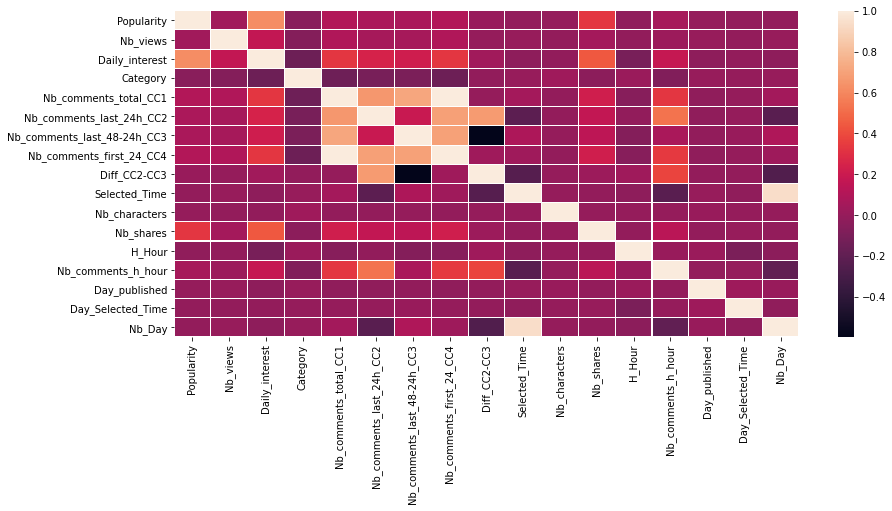

In [46]:
#Heatmap: datascale
dataheat = datascale.copy(deep=True)

plt.figure(figsize = (14,6))
sns.heatmap(dataheat.corr(),linewidth=.1)

In [47]:
#Heatmap complex: datascale
corr = dataheat.corr()
corr.style.background_gradient(cmap='coolwarm')

,Popularity,Nb_views,Daily_interest,Category,Nb_comments_total_CC1,Nb_comments_last_24h_CC2,Nb_comments_last_48-24h_CC3,Nb_comments_first_24_CC4,Diff_CC2-CC3,Selected_Time,Nb_characters,Nb_shares,H_Hour,Nb_comments_h_hour,Day_published,Day_Selected_Time,Nb_Day
Popularity,1.000000,0.044839,0.623436,-0.042167,0.105624,0.077773,0.071448,0.104064,0.009764,-0.005717,-0.003509,0.331114,-0.021676,0.058918,-0.002329,-0.004764,-0.005994
Nb_views,0.044839,1.000000,0.166850,-0.060181,0.098352,0.061610,0.064703,0.101214,0.001620,0.004760,-0.005189,0.052569,-0.014528,0.022982,0.007423,-0.005007,0.004305
Daily_interest,0.623436,0.166850,1.000000,-0.148685,0.329139,0.251529,0.217939,0.329399,0.041487,-0.024592,-0.011251,0.443296,-0.107347,0.177330,-0.022330,-0.003604,-0.024386
Category,-0.042167,-0.060181,-0.148685,1.000000,-0.145932,-0.103961,-0.094728,-0.148661,-0.013638,0.003876,0.037214,-0.028564,0.017831,-0.073673,0.006056,0.001134,0.002960
Nb_comments_total_CC1,0.105624,0.098352,0.329139,-0.145932,1.000000,0.657492,0.713641,0.996736,-0.000170,0.055679,-0.005036,0.225711,-0.049533,0.326882,-0.020310,0.000281,0.047652
Nb_comments_last_24h_CC2,0.077773,0.061610,0.251529,-0.103961,0.657492,1.000000,0.193922,0.689478,0.672384,-0.211857,-0.005820,0.170726,-0.011621,0.528696,-0.019978,-0.001770,-0.225481
Nb_comments_last_48-24h_CC3,0.071448,0.064703,0.217939,-0.094728,0.713641,0.193922,1.000000,0.699315,-0.595761,0.087907,-0.003411,0.151366,-0.063407,0.072088,-0.013365,0.009623,0.094307
Nb_comments_first_24_CC4,0.104064,0.101214,0.329399,-0.148661,0.996736,0.689478,0.699315,1.000000,0.036826,0.039560,-0.005337,0.226146,-0.047222,0.341741,-0.020945,0.000672,0.031260
Diff_CC2-CC3,0.009764,0.001620,0.041487,-0.013638,-0.000170,0.672384,-0.595761,0.036826,1.000000,-0.239775,-0.002191,0.025564,0.038328,0.378453,-0.006272,-0.008710,-0.255759
Selected_Time,-0.005717,0.004760,-0.024592,0.003876,0.055679,-0.211857,0.087907,0.039560,-0.239775,1.000000,0.000495,-0.007470,-0.025803,-0.221962,0.008221,-0.017457,0.942075


<AxesSubplot:>

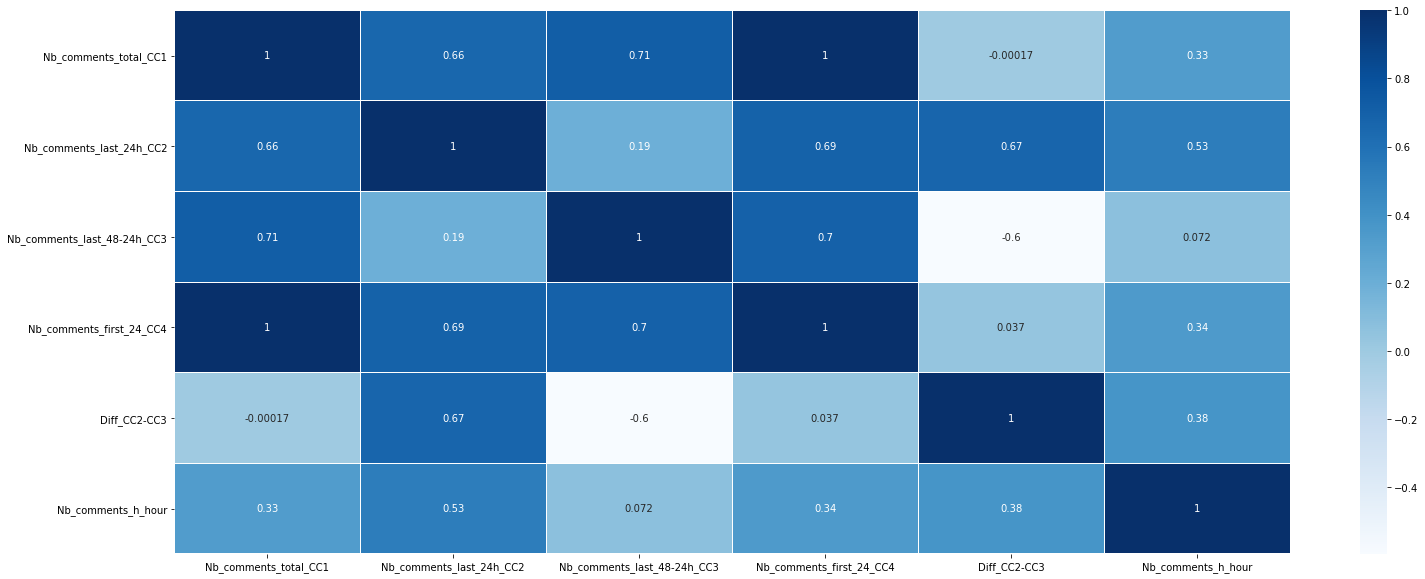

In [48]:
#Heatmap: focus on comments
commentsColumnList = ["Nb_comments_total_CC1",
                      "Nb_comments_last_24h_CC2",
                      "Nb_comments_last_48-24h_CC3",
                      "Nb_comments_first_24_CC4",
                      "Diff_CC2-CC3",
                      "Nb_comments_h_hour"]

dataheatComments = datascale.loc[:,commentsColumnList]
plt.figure(figsize = (25,10))
sns.heatmap(dataheatComments.corr(),linewidth=.1, annot=True, cmap="Blues")

########## Analysis simulation duration (Selected_Time) ##########

C:\Users\moi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '')

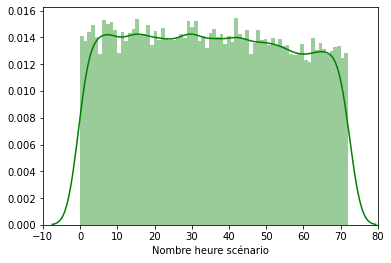

In [49]:
#Distribution plot of Selected Time
selectedTimeValue=datascale["Selected_Time"].value_counts()

fig, ax = plt.subplots()
sns.distplot(datascale["Selected_Time"],bins=len(selectedTimeValue), color="green")
plt.xlim(-10,80)
plt.xlabel("Nombre heure scénario")
plt.ylabel(None)

#Objective:
#See the simulation duration of the study
#Analysis:
#The duration of the scenarios is evenly distributed, ranging from 0h to 72h

<ipython-input-50-69d13b80b600>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels((0,"Dimanche", "Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi"))
C:\Users\moi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Nombre heures scénario')

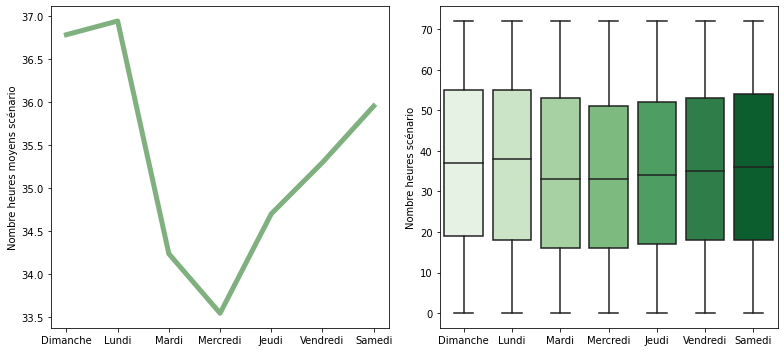

In [50]:
#Plot of Selected Time depending on the day of the week
fig, ax = plt.subplots(1,2,tight_layout=True, figsize=(11,5))

selectedTimeWeek=datascale.groupby(["Day_Selected_Time"]).Selected_Time.mean()
ax[0]=selectedTimeWeek.plot(linewidth=5, color="darkgreen", alpha=0.5, kind="line", ax=ax[0])
ax[0].set_xticklabels((0,"Dimanche", "Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi"))
ax[0].set_xlabel(None)
ax[0].set_ylabel("Nombre heures moyens scénario")

ax[1]= sns.boxplot("Day_Selected_Time", "Selected_Time", data=datascale, ax=ax[1],palette="Greens")
ax[1].set_xticklabels(("Dimanche", "Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi"))
ax[1].set_xlabel(None)
ax[1].set_ylabel("Nombre heures scénario")

#Objective:
#See the simulation duration depending on the day of the week
#Analysis:
#The simulation duration of a post is sensitivaly similar for each day of the week

Text(0, 0.5, 'Nombre commentaires futures')

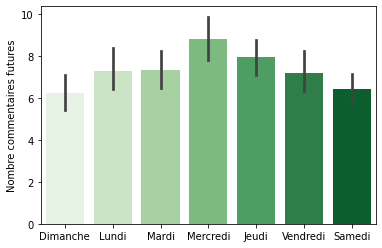

In [51]:
#Barplot of the number of comments depending on the taking day for Selected Time
fig, ax = plt.subplots()
ax = sns.barplot(x = 'Day_Selected_Time', y = 'Nb_comments_h_hour', data = datascale ,palette = "Greens", ax=ax)
ax.set_xticklabels(("Dimanche", "Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi"))
ax.set_xlabel(None)
ax.set_ylabel("Nombre commentaires futures")

#Objective:
#See a link between the number of future comments and DateTime base
#Analysis:
#1)The number of future comments is high in the middle of the week
#2)The number of future comments is low in the week-end
#******************************************************************#

C:\Users\moi\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


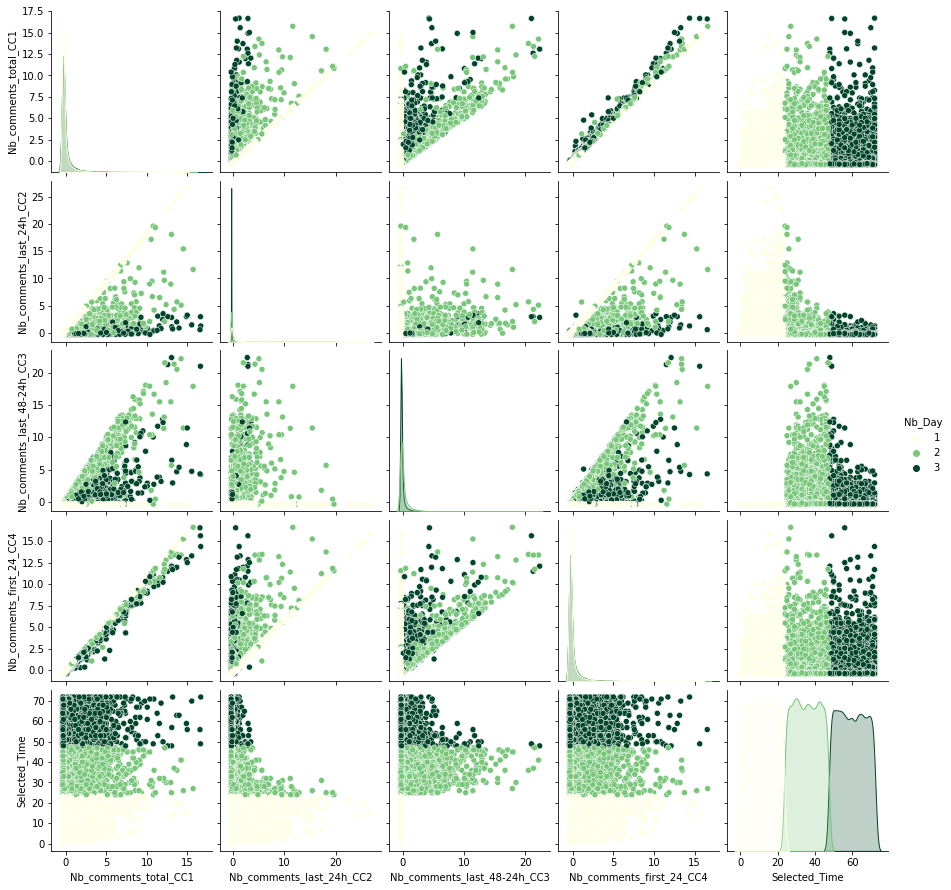

In [52]:
#Pairplot dataComments
dataComments = datascale.loc[:,["Nb_comments_total_CC1","Nb_comments_last_24h_CC2","Nb_comments_last_48-24h_CC3","Nb_comments_first_24_CC4","Selected_Time"]]

def label_Selected_Time (row):
    if row["Selected_Time"]<24:
        return 1
    elif row["Selected_Time"]<48:
        return 2
    else:
        return 3
dataComments['Nb_Day'] = dataComments.apply(lambda row: label_Selected_Time(row), axis=1)

sns.pairplot(dataComments, hue="Nb_Day", palette="YlGn")

#Objective:
#See a link between the simulation time and the number of comments observed at a specific time interval
#Analysis:
#1) The number of comments decreases with the duration of the simulation
#2) Most comments are made during the first 24 hours
#3) For a simulation <24h we have: (nb of comments first 24h) = (nb of comments last 24h) = (total nb of comments)

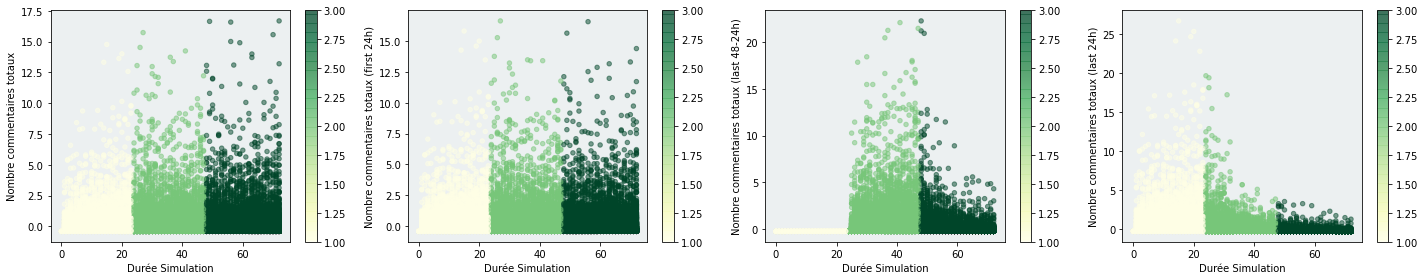

In [53]:
#Plot of number of comments observed at a specific interval depending on Selected Time
dataComments = datascale.loc[:,["Nb_comments_total_CC1","Nb_comments_last_24h_CC2","Nb_comments_last_48-24h_CC3","Nb_comments_first_24_CC4","Selected_Time"]]

def label_Selected_Time (row):
    if row["Selected_Time"]<24:
        return 1
    elif row["Selected_Time"]<48:
        return 2
    else:
        return 3
    
dataComments['Nb_Day'] = dataComments.apply(lambda row: label_Selected_Time(row), axis=1)


fig, ax = plt.subplots(1,4,tight_layout=True, figsize=(20,4))
ax[0]=dataComments.plot.scatter(x="Selected_Time", y="Nb_comments_total_CC1", c=dataComments["Nb_Day"],cmap="YlGn", alpha=0.5, ax=ax[0])
ax[0].set_xlabel("Durée Simulation")
ax[0].set_ylabel("Nombre commentaires totaux")
ax[0].set_facecolor('#ECF0F1')

ax[1]=dataComments.plot.scatter(x="Selected_Time", y="Nb_comments_first_24_CC4", c=dataComments["Nb_Day"],cmap="YlGn", alpha=0.5, ax=ax[1])
ax[1].set_xlabel("Durée Simulation")
ax[1].set_ylabel("Nombre commentaires totaux (first 24h)")
ax[1].set_facecolor('#ECF0F1')

ax[2]=dataComments.plot.scatter(x="Selected_Time", y="Nb_comments_last_48-24h_CC3", c=dataComments["Nb_Day"],cmap="YlGn", alpha=0.5, ax=ax[2])
ax[2].set_xlabel("Durée Simulation")
ax[2].set_ylabel("Nombre commentaires totaux (last 48-24h)")
ax[2].set_facecolor('#ECF0F1')

ax[3]=dataComments.plot.scatter(x="Selected_Time", y="Nb_comments_last_24h_CC2", c=dataComments["Nb_Day"],cmap="YlGn", alpha=0.5, ax=ax[3])
ax[3].set_xlabel("Durée Simulation")
ax[3].set_ylabel("Nombre commentaires totaux (last 24h)")
ax[3].set_facecolor('#ECF0F1')

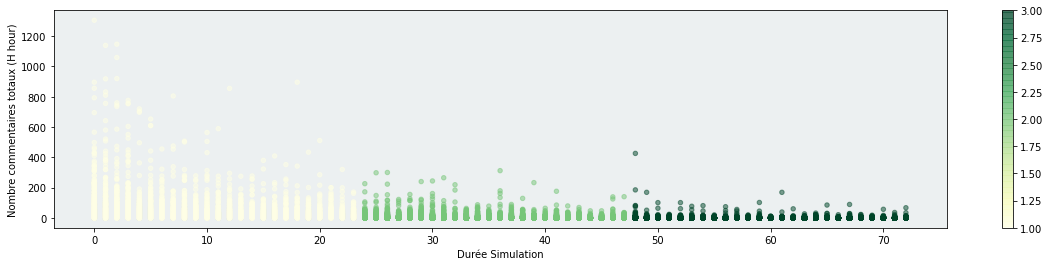

In [54]:
#Plot of target variable depending on Selected Time
fig, ax = plt.subplots(figsize=(20,4))
ax=datascale.plot(x="Selected_Time", y="Nb_comments_h_hour", c=dataComments["Nb_Day"], cmap="YlGn", alpha=0.5, kind="scatter", ax=ax)
ax.set_xlabel("Durée Simulation")
ax.set_ylabel("Nombre commentaires totaux (H hour)")
ax.set_facecolor('#ECF0F1')

#Objective:
#See the link between the target variable and the simulation duration
#Analysis:
#The number of future comments decreases according to the duration of the simulation
#************************************************************************************#

C:\Users\moi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Nombre de commentaires')

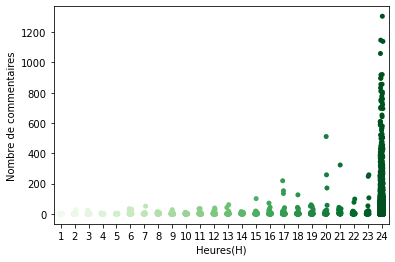

In [55]:
#Stripplot of target depending on H_Hour
fig,ax= plt.subplots()
ax=sns.stripplot("H_Hour", "Nb_comments_h_hour",data=datascale, palette="Greens")
ax.set_xlabel("Heures(H)")
ax.set_ylabel("Nombre de commentaires")

#Objectif:
#Prove that the H_Hour values other than 24h have little impact on the number of comments
#Analysis:
#The number of comments for values H_Hour <24h are mostly close to 0
#********************************************************************#

Text(0, 0.5, '')

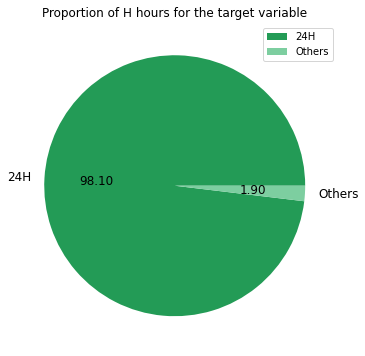

In [56]:
#Distribution of H_Hour
dataHour = datascale.loc[:,["H_Hour"]]
def label_Hour (row):
    if row["H_Hour"]==24:
        return "24H"
    else:
        return "Others"
dataHour['Nb_Hour'] = dataHour.apply(lambda row: label_Hour(row), axis=1)
HourValue=dataHour["Nb_Hour"].value_counts()


fig, ax = plt.subplots()
ax = HourValue.plot.pie(figsize=(6,6),colors=["#239B56","#7DCEA0"],autopct="%.2f",fontsize=12, ax=ax)
ax.set_title("Proportion of H hours for the target variable")
ax.legend()
ax.set_ylabel(None)


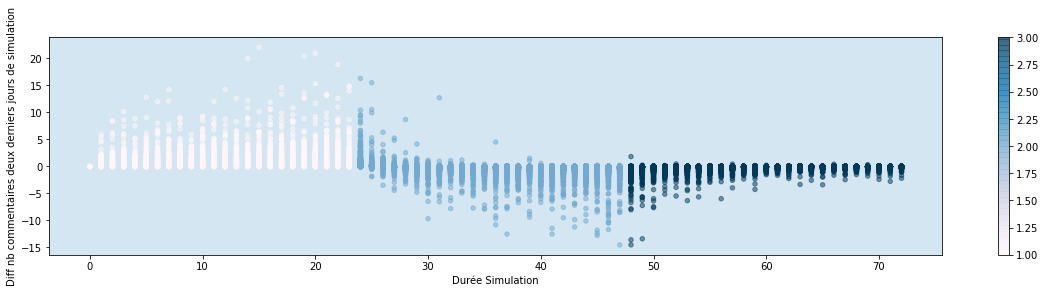

In [57]:
fig, ax = plt.subplots(figsize=(20,4))
ax=datascale.plot(x="Selected_Time", y="Diff_CC2-CC3", c=datascale["Nb_Day"], cmap="PuBu", alpha=0.5, kind="scatter", ax=ax)
ax.set_xlabel("Durée Simulation")
ax.set_ylabel("Diff nb commentaires deux derniers jours de simulation")
ax.set_facecolor('#D4E6F1')

#Objective:
#See the variation in the number of comments according to the number of days
#Analysis:
#1) Case 1 day of simulation: The difference is equal to the number of total comments
#2) Case 2 day of simulation: The difference is negative indicating a decrease in the number of comments
#3) Case 3 day of simulation: The difference is slightly negative indicating a decrease in the number of comments

C:\Users\moi\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Number shares Analysis')

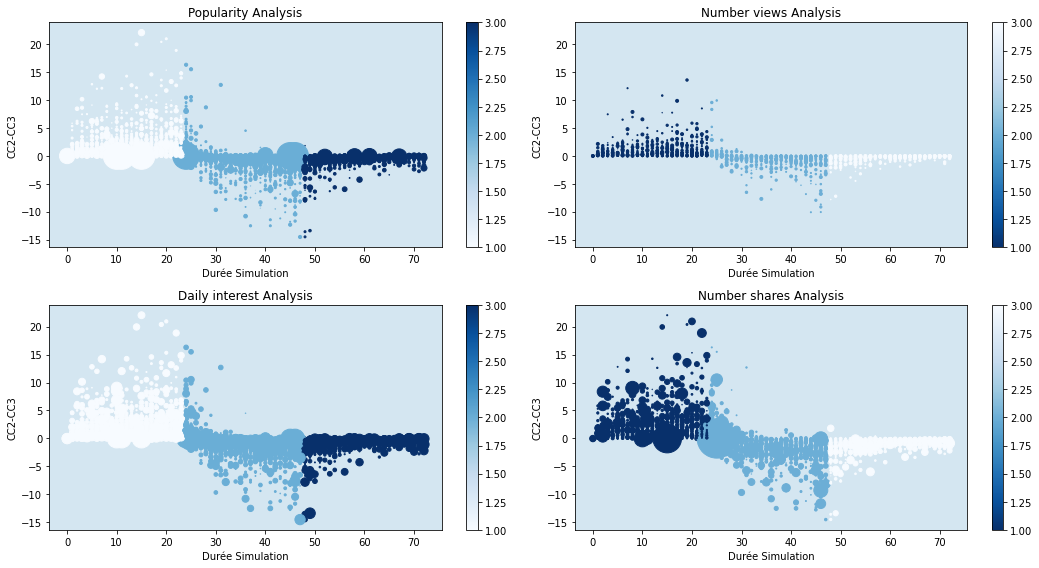

In [58]:
fig,ax= plt.subplots(2,2,tight_layout=True,figsize=(15,8))

size=datascale["Popularity"]*10
color=datascale["Nb_Day"]
ax[0,0]=datascale.plot.scatter("Selected_Time","Diff_CC2-CC3", c=color, s=size ,cmap="Blues",ax=ax[0,0])
ax[0,0].set_xlabel("Durée Simulation")
ax[0,0].set_ylabel("CC2-CC3")
ax[0,0].set_facecolor('#D4E6F1')
ax[0,0].set_title("Popularity Analysis")

size=datascale["Nb_views"]
color=datascale["Nb_Day"]
ax[0,1]=datascale.plot.scatter("Selected_Time","Diff_CC2-CC3", c=color, s=size ,cmap="Blues_r",ax=ax[0,1])
ax[0,1].set_xlabel("Durée Simulation")
ax[0,1].set_ylabel("CC2-CC3")
ax[0,1].set_facecolor('#D4E6F1')
ax[0,1].set_title("Number views Analysis")

size=datascale["Daily_interest"]*10
color=datascale["Nb_Day"]
ax[1,0]=datascale.plot.scatter("Selected_Time","Diff_CC2-CC3", c=color, s=size ,cmap="Blues",ax=ax[1,0])
ax[1,0].set_xlabel("Durée Simulation")
ax[1,0].set_ylabel("CC2-CC3")
ax[1,0].set_facecolor('#D4E6F1')
ax[1,0].set_title("Daily interest Analysis")

size=datascale["Nb_shares"]*10
color=datascale["Nb_Day"]
ax[1,1]=datascale.plot.scatter("Selected_Time","Diff_CC2-CC3", c=color, s=size ,cmap="Blues_r",ax=ax[1,1])
ax[1,1].set_xlabel("Durée Simulation")
ax[1,1].set_ylabel("CC2-CC3")
ax[1,1].set_facecolor('#D4E6F1')
ax[1,1].set_title("Number shares Analysis")

#Objective:
#Understand the reason for the decrease in the number of comments based on the number of days
#Analysis:
#1) Popularity: no visible pattern (some posts are more popular than others)
#2) Nb views: number of almost identical views for each simulation duration
#3) Daily interest: the posts daily interest are generally higher on the first day
#4) Nb shares: - the posts with the most shares are those with the most comments
#              - presence of more sharing the first days

Text(10.746041666666663, 0.5, 'Nombre de commentaires (last 24h)')

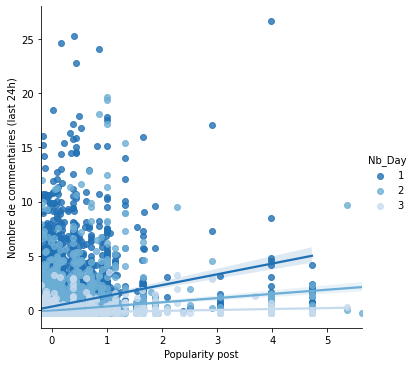

In [59]:
dataMultipleDays = datascale.loc[(datascale['Nb_Day']>=1 ) & (datascale["Popularity"]<20)]

lmplotDailyInterest= sns.lmplot(x='Popularity', y ='Nb_comments_last_24h_CC2',hue="Nb_Day",data=dataMultipleDays, palette="Blues_r")
plt.xlabel("Popularity post")
plt.ylabel("Nombre de commentaires (last 24h)")

#Objective:
#Observe the link between the popularity of a post and the decrease in the number of comments over time
#Analysis:
#1) The popularity and the number of comments decrease slightly depending on the number of days
#2) The difference between the regression lines decreases slightly as a function of the number of days

Text(10.746041666666663, 0.5, 'Nombre de commentaires (last 24h)')

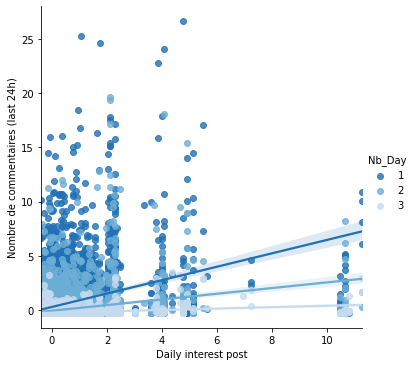

In [60]:
dataMultipleDays = datascale.loc[(datascale['Nb_Day']>=1 ) & (datascale["Daily_interest"]<20)]

lmplotDailyInterest= sns.lmplot(x='Daily_interest', y ='Nb_comments_last_24h_CC2',hue="Nb_Day",data=dataMultipleDays, palette="Blues_r")
plt.xlabel("Daily interest post")
plt.ylabel("Nombre de commentaires (last 24h)")

#Objective:
#Observe the link between the daily interest of a post and the decrease in the number of comments over time
#Analysis:
#1) The daily interest and the number of comments decrease depending on the number of days
#2) The difference between the regression lines decreases as a function of the number of days

Text(10.746041666666663, 0.5, 'Nombre de commentaires (last 24h)')

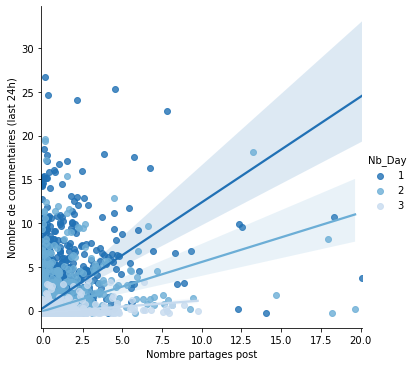

In [61]:
dataMultipleDays = datascale.loc[(datascale['Nb_Day']>=1 ) & (datascale["Nb_shares"]<25)]

lmplotDailyInterest= sns.lmplot(x='Nb_shares', y ='Nb_comments_last_24h_CC2',hue="Nb_Day",data=dataMultipleDays, palette="Blues_r")
plt.xlabel("Nombre partages post")
plt.ylabel("Nombre de commentaires (last 24h)")

#Objective:
#Observe the link between the number of shares of a post and the decrease in the number of comments over time
#Analysis:
#1) The number of shares and the number of comments decrease depending on the number of days
#2) The difference between the regression lines decreases as a function of the number of days

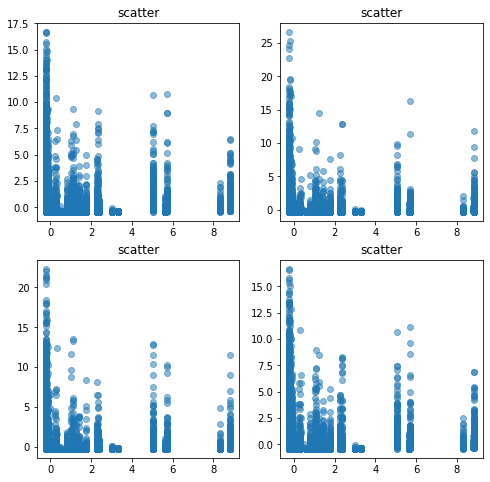

In [62]:
plt.figure(1)

plt.gcf().set_size_inches(8, 8)
plt.subplot(2, 2, 1)
plt.scatter(datascale['Nb_views'],datascale['Nb_comments_total_CC1'],alpha=0.5 )
plt.title("scatter")
plt.subplot(2, 2, 2)
plt.scatter(datascale['Nb_views'],datascale['Nb_comments_last_24h_CC2'],alpha=0.5 )
plt.title("scatter")
plt.subplot(2, 2, 3)
plt.scatter(datascale['Nb_views'],datascale['Nb_comments_last_48-24h_CC3'],alpha=0.5 )
plt.title("scatter")
plt.subplot(2, 2, 4)
plt.scatter(datascale['Nb_views'],datascale['Nb_comments_first_24_CC4'],alpha=0.5 )
plt.title("scatter")
# hostogram of total_bills
  
# Adding the legends
plt.show()

#Objective:
#Observe the link between the number of views of a post and the number of comments over time
#Analysis:
#The number of views do not have an impact on the number of comments

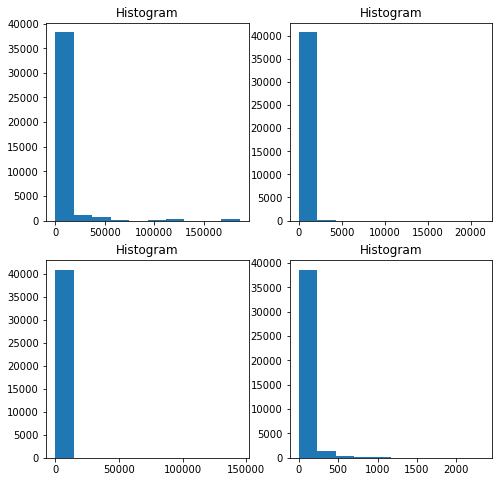

In [63]:
plt.figure(1)

plt.gcf().set_size_inches(8, 8)
plt.subplot(2, 2, 1)
plt.hist(data['Nb_views'])
plt.title("Histogram")
plt.subplot(2, 2, 2)
plt.hist(data['Nb_characters'])
plt.title("Histogram")
plt.subplot(2, 2, 3)
plt.hist(data['Nb_shares'])
plt.title("Histogram")
plt.subplot(2, 2, 4)
plt.hist(data['Nb_comments_total_CC1'])
plt.title("Histogram")
# histogram of total_bills
# Adding the legends
plt.show()

#Objective:
#See the distribution of different features
#Analysis:
#1) Nb_views: 0<Nb_views<50000 mostly
#2) Nb_characters: 0<Nb_characters<5000 mostly
#3) Nb_views: 0<Nb_shares<50000 mostly
#4) Nb_views: 0<Nb_comments_total_CC1<500 mostly

<AxesSubplot:xlabel='Nb_comments_total_CC1', ylabel='Nb_comments_first_24_CC4'>

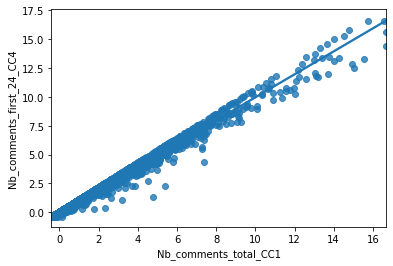

In [64]:
sns.regplot(x=datascale["Nb_comments_total_CC1"], y=datascale["Nb_comments_first_24_CC4"])

<AxesSubplot:xlabel='Nb_comments_total_CC1', ylabel='Nb_comments_last_48-24h_CC3'>

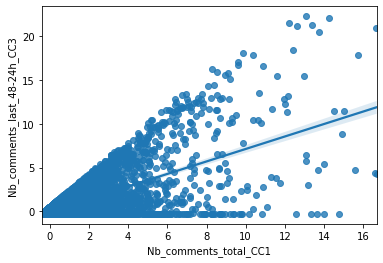

In [65]:
sns.regplot(x=datascale["Nb_comments_total_CC1"], y=datascale["Nb_comments_last_48-24h_CC3"])

<AxesSubplot:xlabel='Nb_comments_total_CC1', ylabel='Nb_comments_first_24_CC4'>

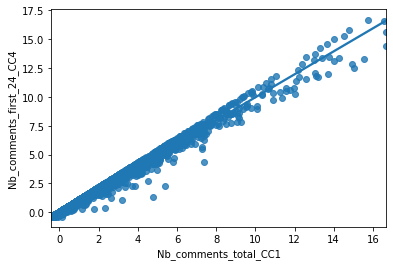

In [66]:
sns.regplot(x=datascale["Nb_comments_total_CC1"], y=datascale["Nb_comments_first_24_CC4"])

########## Other plots ##########

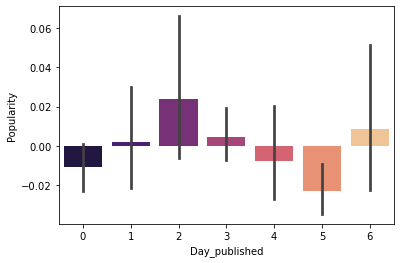

In [67]:
sns.barplot(x = 'Day_published',y = 'Popularity',data = datascale,palette = "magma")
plt.show()

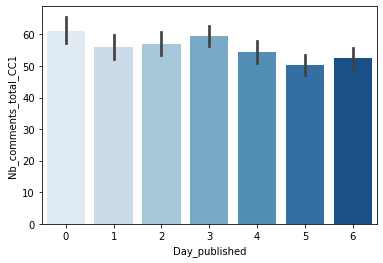

In [68]:
import seaborn as sns
sns.barplot(x = 'Day_published',y = 'Nb_comments_total_CC1',data = data,palette = "Blues")
plt.show()

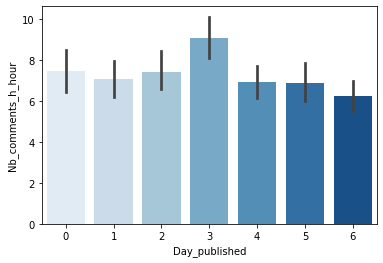

In [69]:
sns.barplot(x = 'Day_published',y = 'Nb_comments_h_hour',data = data,palette = "Blues")
plt.show()

<AxesSubplot:ylabel='Nb_views'>

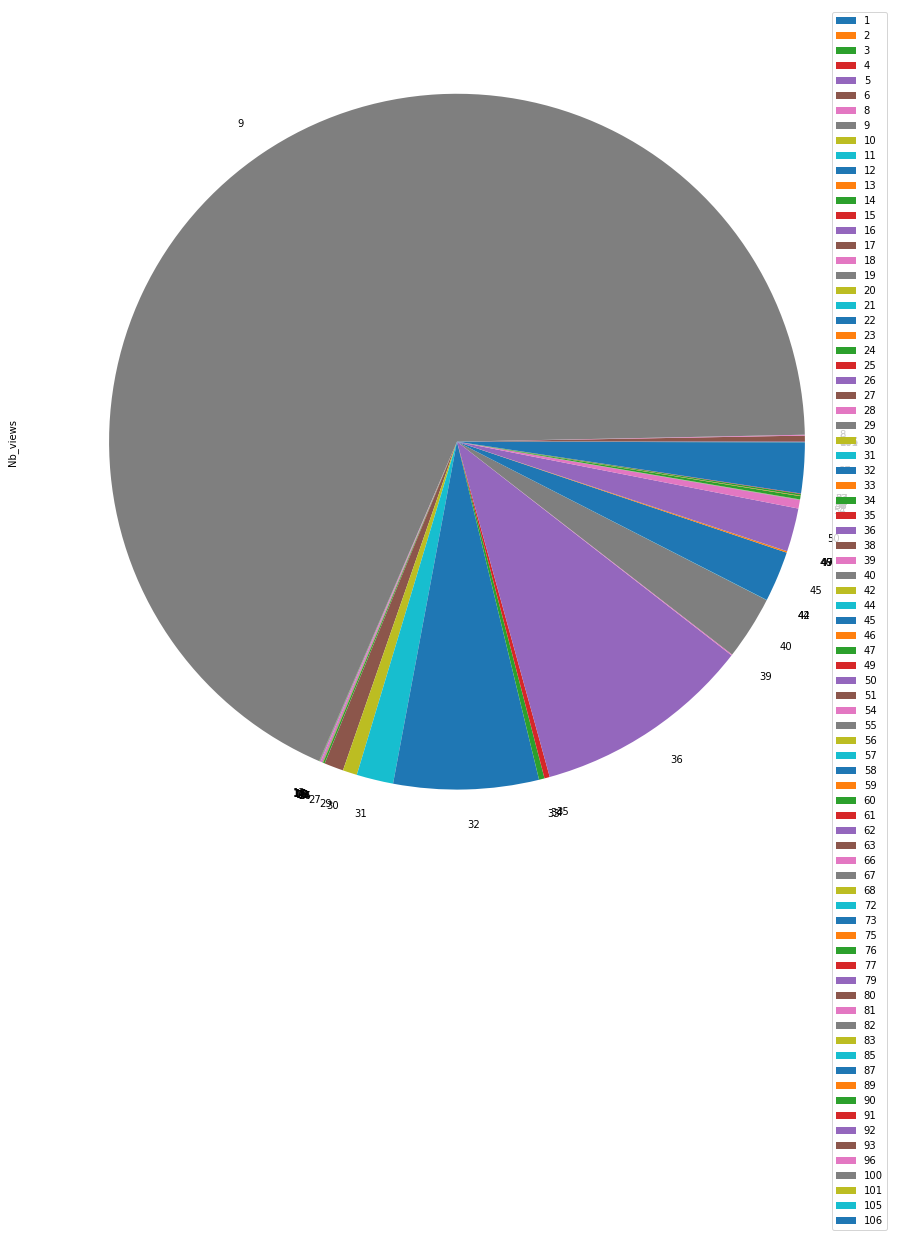

In [70]:
data.groupby(['Category']).sum().plot(kind='pie', y='Nb_views',figsize=(16,16))

<AxesSubplot:ylabel='Nb_shares'>

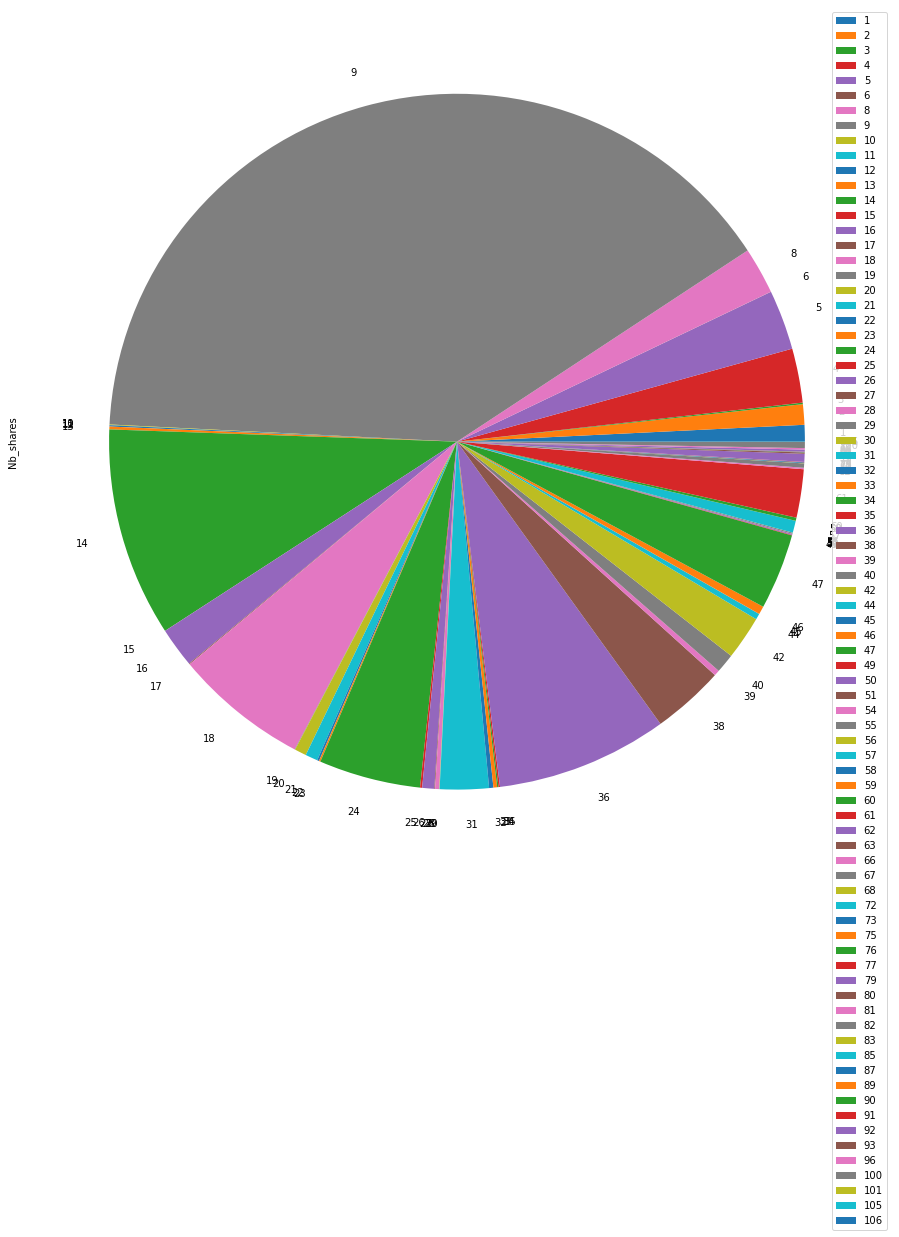

In [71]:
data.groupby(['Category']).sum().plot(kind='pie', y='Nb_shares',figsize=(16,16))

<AxesSubplot:ylabel='Category'>

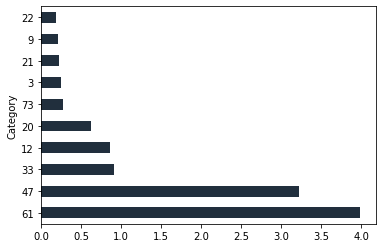

In [72]:
category=datascale.groupby(["Category"]).Popularity.mean().sort_values(ascending=False).head(10)
category.plot.barh("Category",category.values, color="#212F3D")


<AxesSubplot:xlabel='Day_published,Category'>

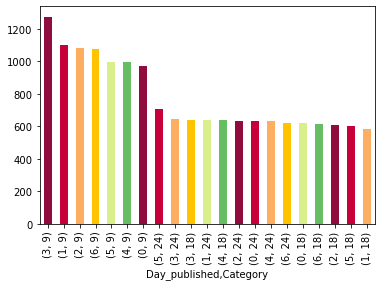

In [73]:
categoryDay=datascale.groupby(["Day_published","Category"]).Category.count().sort_values(ascending=False).groupby(level=0).head(3)
categoryDay.plot.bar("Day_published","Category", color=["#900C3F","#C70039","#FDAE61","#FFC300","#D9EF8B","#66BD63"])

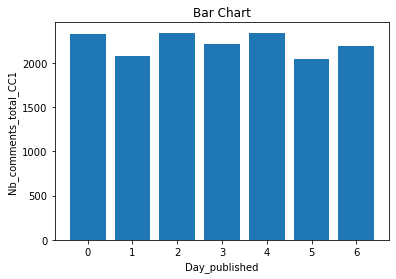

In [76]:
plt.bar(data['Day_published'], data['Nb_comments_total_CC1'])
  
plt.title("Bar Chart")
  
plt.xlabel('Day_published')
plt.ylabel('Nb_comments_total_CC1')
  
plt.show()

########## Machine Learning ##########

In [75]:
x_scaled=data_scaled.drop(columns=["Min Page 0","Max Page 0","Average Page 0","Median Page 0","Sd Page 0",
                                  "Min Page 1","Max Page 1","Average Page 1","Median Page 1","Sd Page 1",
                                  "Min Page 2","Max Page 2","Average Page 2","Median Page 2","Sd Page 2",
                                  "Min Page 3","Max Page 3","Average Page 3","Median Page 3","Sd Page 3",
                                   "Min Page 4","Max Page 4","Average Page 4","Median Page 4","Sd Page 4",
                                   "Nb_comments_h_hour"
                                  ]) 

x_scaled

,Popularity,Nb_views,Daily_interest,Category,Nb_comments_total_CC1,Nb_comments_last_24h_CC2,Nb_comments_last_48-24h_CC3,Nb_comments_first_24_CC4,Diff_CC2-CC3,Selected_Time,Nb_characters,Nb_shares,H_Hour,Day_published,Day_Selected_Time
0,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,1.418871,0.006239,-0.121958,0.120932,-0.022487,1.482581
1,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,-1.210619,-0.084124,-0.123016,0.120932,0.491643,0.980740
2,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,-1.019383,-0.081466,-0.121958,0.120932,1.005772,1.482581
3,-0.100037,-0.227075,-0.399678,-1.165633,-0.355691,-0.287678,-0.234246,-0.356001,-0.058778,1.275444,-0.086782,-0.123016,0.120932,1.005772,-1.026624
4,-0.100037,-0.227075,-0.399678,-1.165633,-0.399495,-0.287678,-0.276454,-0.402811,-0.026931,1.084209,-0.057547,-0.118783,0.120932,-1.050746,-0.022942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,0.863039,-0.223675,4.076353,-0.764638,1.557081,-0.106150,0.539555,1.461779,-0.494013,0.988591,-0.403053,1.474876,-11.338563,-0.022487,0.980740
40945,0.863039,-0.223675,4.076353,-0.764638,4.294826,-0.028353,1.214872,4.418596,-0.939865,0.845164,-0.038942,1.038894,-10.817676,-0.022487,0.980740
40946,0.863039,-0.223675,4.076353,-0.764638,4.119610,7.751395,-0.276454,4.426398,6.554682,-0.780338,-0.116017,3.010333,0.120932,-0.022487,0.478899
40947,0.863039,-0.223675,4.076353,-0.764638,4.185316,2.162943,5.913954,4.176746,-2.691423,-0.111014,-0.347240,1.339425,-7.692360,-0.022487,0.980740


In [26]:
x_features=data.loc[1:1000, data.columns!='Nb_comments_h_hour']
#x_features=x_scaled.loc[1:10000]
x_features

,Popularity,Nb_views,Daily_interest,Category,Nb_comments_total_CC1,Nb_comments_last_24h_CC2,Nb_comments_last_48-24h_CC3,Nb_comments_first_24_CC4,Diff_CC2-CC3,Selected_Time,Nb_characters,Nb_shares,H_Hour,Day_published,Day_Selected_Time
1,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,-1.210619,-0.084124,-0.123016,0.120932,0.491643,0.980740
2,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,-1.019383,-0.081466,-0.121958,0.120932,1.005772,1.482581
3,-0.100037,-0.227075,-0.399678,-1.165633,-0.355691,-0.287678,-0.234246,-0.356001,-0.058778,1.275444,-0.086782,-0.123016,0.120932,1.005772,-1.026624
4,-0.100037,-0.227075,-0.399678,-1.165633,-0.399495,-0.287678,-0.276454,-0.402811,-0.026931,1.084209,-0.057547,-0.118783,0.120932,-1.050746,-0.022942
5,-0.100037,-0.227075,-0.399678,-1.165633,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,1.179826,0.006239,-0.123016,0.120932,-0.536616,0.980740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-0.192992,-0.227075,-0.394792,-0.313517,-0.341089,-0.222846,-0.220177,-0.340397,-0.016316,-0.350058,-0.392422,-0.121958,0.120932,0.491643,1.482581
9997,-0.192992,-0.227075,-0.394792,-0.313517,-0.362991,-0.209880,-0.276454,-0.363802,0.036762,-1.210619,-0.392422,-0.120900,0.120932,1.005772,1.482581
9998,-0.192992,-0.227075,-0.394792,-0.313517,-0.362991,-0.235813,-0.248315,-0.363802,-0.005700,-0.397867,-0.392422,-0.120900,0.120932,1.005772,-1.528465
9999,-0.192992,-0.227075,-0.394792,-0.313517,-0.406795,-0.287678,-0.276454,-0.410612,-0.026931,0.367075,-0.320663,-0.123016,0.120932,1.519902,-1.026624


In [27]:
y_target=data["Nb_comments_h_hour"]
y_target=y_target.loc[1:10000]
y_target

1        0
2        0
3        0
4        0
5        0
        ..
9996     1
9997     2
9998     0
9999     0
10000    1
Name: Nb_comments_h_hour, Length: 10000, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 15)
(2000, 15)
(8000,)
(2000,)


In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
#listr2 = [0,0,0,0,0,0]

In [37]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_train_predict = lin_model.predict(x_train)
r2 = r2_score(y_train, y_train_predict)
print(r2)

0.309102082152796


In [38]:
y_pred=lin_model.predict(x_test)
r2lin = r2_score(y_test, y_pred)
listr2[0]=(r2lin)
print(r2lin)

0.5405388365816941


In [18]:
cross_val_score(svm.SVR(kernel='linear'),x_train,y_train,n_jobs=-1)

array([0.20331633, 0.31949458, 0.35806875, 0.17399925, 0.272924  ])

In [19]:
cross_val_score(svm.SVR(kernel='rbf'),x_train,y_train,n_jobs=-1)

array([0.1075234 , 0.12973528, 0.16137743, 0.09547865, 0.13510296])

In [31]:
parameters={ 'C':[190,200,250,260],
            'kernel':['linear'],
            'gamma': [0.01,0.05,0.07],
            'epsilon':[1.5,2,2.5],
           'degree':[1,2,5]}
grid= GridSearchCV(svm.SVR(),parameters,n_jobs=-1)
grid.fit(x_train,y_train)
res=grid.best_estimator_
print(grid.best_score_,grid.best_estimator_)

0.2702842898761167 SVR(C=260, degree=1, epsilon=2.5, gamma=0.01, kernel='linear')


In [32]:
svr_model = res
y_pred=svr_model.predict(x_test)
r2svr = r2_score(y_test, y_pred)
listr2[1]=(r2svr)
print(r2svr)

0.4831928959089947


In [28]:
parameters={ 'C':[190,200,250,260],
            'kernel':['rbf'],
            'gamma': [0.01,0.05,0.07],
            'epsilon':[1.5,2,2.5],
           'degree':[1,2,5]}
grid= GridSearchCV(svm.SVR(),parameters,n_jobs=-1)
grid.fit(x_train,y_train)
res=grid.best_estimator_
print(grid.best_score_,grid.best_estimator_)

0.44282926925627286 SVR(C=260, degree=1, epsilon=2.5, gamma=0.05)


In [29]:
svr_model2 = res
y_pred=svr_model2.predict(x_test)
r2svr2= r2_score(y_test, y_pred)
listr2[2]=(r2svr2)
print(r2svr2)

0.5554350638747663


In [20]:
parameters={ 'alpha':[0.01,0.1,0.5,0.05]}
grid= GridSearchCV(linear_model.Ridge(),parameters,n_jobs=-1)
grid.fit(x_train,y_train)
res=grid.best_estimator_
print(grid.best_score_,grid.best_estimator_)

0.3162103545206872 Ridge(alpha=0.5)


In [21]:
ridge_model = res
y_pred=ridge_model.predict(x_test)
r2ridge = r2_score(y_test, y_pred)
listr2[3]=(r2ridge)
print(r2ridge)

0.5429717354655494


In [22]:
parameters={ 'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
           'l1_ratio': [0, 1, 0.01]}
grid= GridSearchCV(ElasticNet(),parameters,n_jobs=-1)
grid.fit(x_train,y_train)
res=grid.best_estimator_
print(grid.best_score_,grid.best_estimator_)

0.3165360480395118 ElasticNet(alpha=0.01, l1_ratio=0)


C:\Users\moi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4571985.083812611, tolerance: 1319.4443579875
  model = cd_fast.enet_coordinate_descent(


In [23]:
elasticNet_model = res
y_pred=elasticNet_model.predict(x_test)
r2elasticNet = r2_score(y_test, y_pred)
listr2[4]=(r2elasticNet)
print(r2elasticNet)

0.542083217997908


In [15]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]}
                 

GBR = GradientBoostingRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, n_jobs=-1)
grid_GBR.fit(x_train, y_train)
resgbr=grid_GBR.best_estimator_
print(grid_GBR.best_score_,grid_GBR.best_estimator_)

0.665342037195843 GradientBoostingRegressor(learning_rate=0.03, max_depth=8, subsample=0.2)


In [23]:
gbr_model = resgbr
y_pred=gbr_model.predict(x_test)
r2gbr = r2_score(y_test, y_pred)
listr2[5]=(r2gbr)
print(r2gbr)

0.8754123152576808


In [ ]:
import pickle
pickle.dump(gbr_model, open('modelGBR.pkl','wb'))

gbr_model_columns= list(x_features.columns)
pickle.dump(gbr_model_columns, open('modelGBR_columns.pkl','wb'))

pickle.dump(scaler,open('scaler.pkl','wb'))

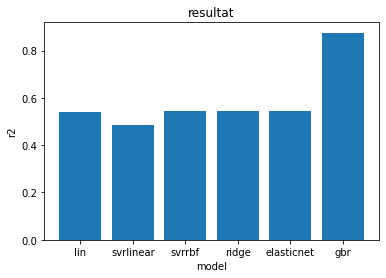

In [28]:
namemodel=['lin','svrlinear','svrrbf','ridge','elasticnet','gbr']
plt.bar(namemodel,listr2)
plt.title('resultat')
plt.xlabel('model')
plt.ylabel('r2')
plt.show()